## Python for solving coupled non-linear differential equations
### We shall follow examples from the following blogs 
http://www.gribblelab.org/compneuro/2_Modelling_Dynamical_Systems.html  <br>
http://www.danham.me/r/2015/10/29/differential-eq.html <br>
http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html <br>

In [1]:
#import important modules
import numpy as np
import matplotlib.animation as animation
import matplotlib.pylab as plt
from scipy.integrate import odeint

#to display images
from IPython.display import Image

#magic to show plots inline
%matplotlib inline

### Example 1: Mass - Spring system
#### The Problem:
<img src="http://www.gribblelab.org/compneuro/figs/spring-mass.png" width="100" height="100" />
#### The Equations:
$$\sum{F} = m\ddot{x}=-kx + mg$$

In [2]:
def MassSpring(state,t):
  # unpack the state vector
  x = state[0]
  xd = state[1]

  # these are our constants
  k = 2.5 # Newtons per metre
  m = 1.5 # Kilograms
  g = 9.8 # metres per second

  # compute acceleration xdd
  xdd = ((-k*x)/m) + g

  # return the two state derivatives
  return [xd, xdd]

### Solution and visualization

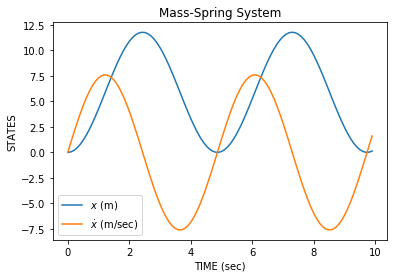

In [5]:
state0 = [0.0, 0.0]
t = np.arange(0.0, 10.0, 0.1)

state = odeint(MassSpring, state0, t)

plt.plot(t, state)
plt.xlabel('TIME (sec)')
plt.ylabel('STATES')
plt.title('Mass-Spring System')
plt.legend(('$x$ (m)', '$\dot{x}$ (m/sec)'))

## Example 2: Lorenz Attractor
#### The problem:
<center> $\dot{x}=\sigma(y-x)$ <br>
$\dot{y}=(\rho-z)x-y$ <br>
$\dot{z}=xy-\beta z$ <br>

Chaotic behaviour if <br>
$(\sigma,\rho,\beta) = (10,28,10/3)$  <br>

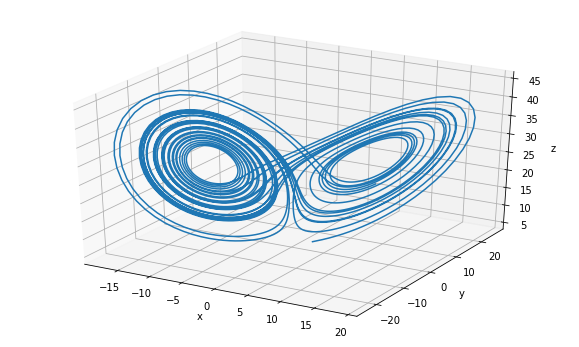

In [16]:
def Lorenz(state,t):
  # unpack the state vector
  x = state[0]
  y = state[1]
  z = state[2]

  # these are our constants
  sigma = 10.0
  rho = 28.0
  beta = 8.0/3.0

  # compute state derivatives
  xd = sigma * (y-x)
  yd = (rho-z)*x - y
  zd = x*y - beta*z

  # return the state derivatives
  return [xd, yd, zd]

state0 = [2.0, 3.0, 4.0]
t = np.arange(0.0, 30.0, 0.01)

state = odeint(Lorenz, state0, t)

# do some fancy 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
ax.plot(state[:,0],state[:,1],state[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Example 3: Predator-Prey model
### The problem:
<center> $\dot{x}=x(\alpha - \beta y)$ <br>
$\dot{y}=-y(\gamma - \sigma x)$
</center>
### Solve the system for $(\alpha, \beta, \gamma, \sigma)=(0.1,0.1,0.1,0.1)$ 